<a href="https://colab.research.google.com/github/Cloud2602/Risk-Estimation-from-Multi-Sensor-Motion-Data/blob/main/Risk_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Estimation from Multi Sensor Motion Data

### Download Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# For v1.0 version of mini dataset
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_metadata_v1.0-mini.zip
!wget https://man-truckscenes.s3.eu-central-1.amazonaws.com/release/mini/man-truckscenes_sensordata_v1.0-mini.zip
!unzip "man-truckscenes_*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774203324.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774255266.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774301638.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774353886.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774405448.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774451912.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774502890.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774554263.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774601671.pcd  
  inflating: man-truckscenes/sweeps/RADAR_RIGHT_FRONT/RADAR_RIGHT_FRONT_1706716774653074.pcd  

In [ ]:
%%bash
mkdir -p /content/data
cd "/content/drive/MyDrive"
unzip -o "man-truckscenes_*.zip" -d "/content"

Archive:  man-truckscenes_sensordata_v1.0-mini.zip
   creating: /content/man-truckscenes/
   creating: /content/man-truckscenes/samples/
   creating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473372666841.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373166828.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473373666803.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374166792.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473374667278.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375166805.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BACK_1695473375666769.jpg  
  inflating: /content/man-truckscenes/samples/CAMERA_LEFT_BACK/CAMERA_LEFT_BAC


2 archives were successfully processed.


Open github repository

In [ ]:
!git clone https://github.com/Cloud2602/Risk-Estimation-from-Multi-Sensor-Motion-Data.git

Cloning into 'Risk-Estimation-from-Multi-Sensor-Motion-Data'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
Receiving objects: 100% (12/12), done.
Resolving deltas: 100% (2/2), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)


## Initialization

In [14]:
!pip install truckscenes-devkit[all]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.9 MB/s eta 0:00:00
   ━━━

In [7]:
%matplotlib inline
from truckscenes import TruckScenes

trucksc = TruckScenes('v1.0-mini', 'man-truckscenes', True)

Loading truckscenes tables for version v1.0-mini...
11 attribute,
18 calibrated_sensor,
27 category,
20090 ego_motion_cabin,
20089 ego_motion_chassis,
20116 ego_pose,
1094 instance,
400 sample,
25750 sample_annotation,
43556 sample_data,
10 scene,
18 sensor,
4 visibility,
Done loading in 1.202 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


## BEV Prova

In [ ]:
!mkdir /content/man-truckscenes/samples/BEV


In [ ]:
import json

file_path = "/content/man-truckscenes/v1.0-mini/sample_data.json"

try:
    with open(file_path, 'r') as f:
        data = json.load(f)
    print("✅ JSON caricato correttamente.")
except json.JSONDecodeError as e:
    print("❌ Errore nel parsing del file JSON:")
    print(f"  Messaggio: {e.msg}")
    print(f"  Riga: {e.lineno}, Colonna: {e.colno}")
    print(f"  Posizione: {e.pos}")

    # Stampa la riga problematica
    with open(file_path, 'r') as f:
        lines = f.readlines()
        if e.lineno <= len(lines):
            print("\n🔍 Riga con l'errore:")
            print(lines[e.lineno - 1].rstrip())
        else:
            print("⚠️ Impossibile accedere alla riga dell'errore: fuori intervallo.")
except FileNotFoundError:
    print("❌ File non trovato.")
except Exception as e:
    print(f"❌ Altro errore: {e}")


✅ JSON caricato correttamente.


In [ ]:
# Mostra i primi 5 sample_token validi
valid_samples = trucksc.sample
for i in range(5):
    print(f"[{i}] sample_token:", valid_samples[i]['token'])


[0] sample_token: 32d2bcf46e734dffb14fe2e0a823d059
[1] sample_token: deb7b3f332f042d49e7636d6e4959354
[2] sample_token: a574551be31547e4b7c78ff87c75abb3
[3] sample_token: 1393759bf6ff4f8e88deff0da0dc2aca
[4] sample_token: 368662645c194921b716c026347db664


In [ ]:
record = trucksc.get('sample', "32d2bcf46e734dffb14fe2e0a823d059")
print(record)

{'token': '32d2bcf46e734dffb14fe2e0a823d059', 'scene_token': '044c648ac12345f1aedf33c9f91cdc5a', 'timestamp': 1695473372698161, 'prev': '', 'next': 'deb7b3f332f042d49e7636d6e4959354', 'data': {'RADAR_RIGHT_BACK': 'c790efd2151d491aae635234a5df26d8', 'RADAR_RIGHT_SIDE': '7f3083ba7f2e49678b4ccbc2fd14f590', 'RADAR_RIGHT_FRONT': '36c9a2c6b3ee4d9f9d01c902521cbb27', 'RADAR_LEFT_FRONT': '1e6375db490e4563b55fce389b06a53b', 'RADAR_LEFT_SIDE': 'c58e24c2e644404f85a5c0901d367338', 'RADAR_LEFT_BACK': 'e940e3abeab34da8833e013c84b52366', 'LIDAR_LEFT': '9ae8f9fd6cd2458298c82eb6a85119a6', 'LIDAR_RIGHT': '28a12ab75263458a977dd29ca4e54ee2', 'LIDAR_TOP_FRONT': '1ac1e8bcd1ed4493a73c011dc2441713', 'LIDAR_TOP_LEFT': '85c18e7eeb3c42f194eba257dcf6d66c', 'LIDAR_TOP_RIGHT': '064d8efa5f31493db10f96dbeef91282', 'LIDAR_REAR': '18b4fe677dc7408b84ebd555c559da16', 'CAMERA_LEFT_FRONT': '7625b794c8a14e918dc23113ee5d10da', 'CAMERA_LEFT_BACK': 'c6e32737071942fb9d5bcd8c69a88181', 'CAMERA_RIGHT_FRONT': '4e11f21f05be46f3b219a

### immagine di prova

<ipython-input-6-acae677eb106>:48: RuntimeWarning: overflow encountered in scalar add
  R_chan[xi, yi] += 1


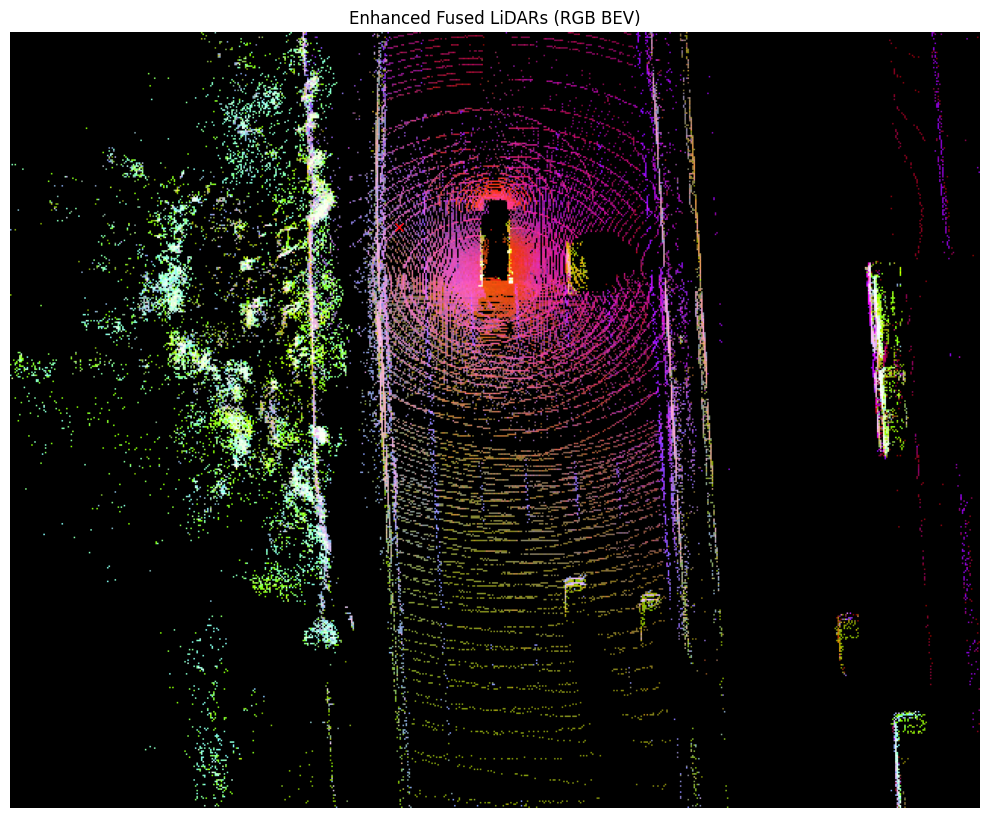

In [ ]:
from scipy.spatial.transform import Rotation as R
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from truckscenes.utils.geometry_utils import transform_matrix
from pyquaternion import Quaternion
from truckscenes.utils.data_classes import LidarPointCloud


def bev_rgb_enhanced(points, intensities=None,
                     res=0.1,
                     side_range=(-40, 40), fwd_range=(-20, 60),
                     height_range=(-2, 2)):

    x, y, z = points[:, 0], points[:, 1], points[:, 2]
    if intensities is None:
        intensities = np.ones_like(x)

    # Applica il filtro per inquadrare l'area desiderata
    mask = (
        (x > fwd_range[0]) & (x < fwd_range[1]) &
        (y > side_range[0]) & (y < side_range[1])
    )
    x, y, z, intensities = x[mask], y[mask], z[mask], intensities[mask]

    # Converti in coordinate immagine
    x_img = ((x - fwd_range[0]) / res).astype(np.int32)
    y_img = ((y - side_range[0]) / res).astype(np.int32)
    H = int((fwd_range[1] - fwd_range[0]) / res)
    W = int((side_range[1] - side_range[0]) / res)

    # Mappa z e intensità su [0, 255]
    z_scaled = ((np.clip(z, *height_range) - height_range[0]) /
                (height_range[1] - height_range[0]) * 255).astype(np.uint8)
    intensities_scaled = ((intensities - np.min(intensities)) /
                          (np.ptp(intensities) + 1e-8) * 255).astype(np.uint8)

    # Crea 3 canali: R = densità, G = altezza, B = intensità
    R_chan = np.zeros((H, W), dtype=np.uint8)
    G_chan = np.zeros((H, W), dtype=np.uint8)
    B_chan = np.zeros((H, W), dtype=np.uint8)

    for xi, yi, zi, ii in zip(x_img, y_img, z_scaled, intensities_scaled):
        if 0 <= xi < H and 0 <= yi < W:
            G_chan[xi, yi] = max(G_chan[xi, yi], zi)
            B_chan[xi, yi] = max(B_chan[xi, yi], ii)
            R_chan[xi, yi] += 1

    # Normalizza canale R
    if R_chan.max() > 0:
        R_chan = np.clip((R_chan / R_chan.max()) * 255, 0, 255).astype(np.uint8)

    # Equalizzazione (facoltativa ma migliora il contrasto)
    R_eq = cv2.equalizeHist(R_chan)
    G_eq = cv2.equalizeHist(G_chan)
    B_eq = cv2.equalizeHist(B_chan)

    bev = np.stack([R_eq, G_eq, B_eq], axis=-1)
    bev = cv2.resize(bev, (640, 512), interpolation=cv2.INTER_NEAREST)

    return bev


def render_lidar_fused_enhanced(trucksc, sample_token: str, nsweeps: int = 1,
                                res=0.1, side_range=(-40, 40), fwd_range=(-20, 60),
                                height_range=(-3, 2),
                                figsize=(10, 10)):

    record = trucksc.get('sample', sample_token)

    # Trova tutti i token dei sensori lidar
    lidar_tokens = [
        token for channel, token in record['data'].items()
        if trucksc.get('sample_data', token)['sensor_modality'] == 'lidar'
    ]

    all_points = []

    for token in lidar_tokens:
        sd = trucksc.get('sample_data', token)
        sample = trucksc.get('sample', sd['sample_token'])
        chan = sd['channel']
        ref_chan = 'LIDAR_LEFT'
        ref_token = sample['data'][ref_chan]
        ref_sd = trucksc.get('sample_data', ref_token)

        pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample, chan, ref_chan, nsweeps=nsweeps)
        points = pc.points[:3, :]
        intensity = pc.points[3, :]

        # === Trasformazione in flat ego frame ===
        cs_record = trucksc.get('calibrated_sensor', ref_sd['calibrated_sensor_token'])
        pose_record = trucksc.get('ego_pose', ref_sd['ego_pose_token'])

        ref_to_ego = transform_matrix(cs_record['translation'], Quaternion(cs_record['rotation']))
        ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
        rotation_flat = np.dot(
            Quaternion(scalar=np.cos(ego_yaw / 2),
                       vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
            Quaternion(pose_record['rotation']).inverse.rotation_matrix
        )
        vehicle_flat = np.eye(4)
        vehicle_flat[:3, :3] = rotation_flat
        viewpoint = np.dot(vehicle_flat, ref_to_ego)

        points_h = np.vstack((points, np.ones(points.shape[1])))
        transformed = (viewpoint @ points_h).T[:, :3]

        all_points.append(np.hstack((transformed, intensity.reshape(-1, 1))))

    fused_points = np.vstack(all_points)

    # === Crea immagine BEV ===
    bev_img = bev_rgb_enhanced(fused_points[:, :3], fused_points[:, 3],
                               res=res,
                               side_range=side_range,
                               fwd_range=fwd_range,
                               height_range=height_range)

    # === Mostra immagine ===
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(bev_img)
    ax.axis('off')
    ax.set_title("Enhanced Fused LiDARs (RGB BEV)")

    # Centro veicolo (x=0, y=0)
    center_x = int((0 - fwd_range[0]) / res * 512 / ((fwd_range[1] - fwd_range[0]) / res))
    center_y = int((0 - side_range[0]) / res * 512 / ((side_range[1] - side_range[0]) / res))
    ax.plot(center_y, center_x, 'rx')

    plt.tight_layout()
    plt.show()


render_lidar_fused_enhanced(trucksc, "34d0b00f1801498c803ec07dce543b72")


## Creazione Dataset

In [13]:
! rm -rf /content/DATASET
! rm -rf /content/runs

[1/400] Rendering sample: 32d2bcf46e734dffb14fe2e0a823d059
[2/400] Rendering sample: deb7b3f332f042d49e7636d6e4959354
[3/400] Rendering sample: a574551be31547e4b7c78ff87c75abb3
[4/400] Rendering sample: 1393759bf6ff4f8e88deff0da0dc2aca
[5/400] Rendering sample: 368662645c194921b716c026347db664
[6/400] Rendering sample: a42b482121464aa795d24f55400c574f
[7/400] Rendering sample: 814d7dd86f1a47e28385ee434cdb6b1a
[8/400] Rendering sample: a1bcff3507ba48d991ec098093d75394
[9/400] Rendering sample: 8a5f89a6ebaa4d75aa70bf4b31734ea5
[10/400] Rendering sample: 3c7fe0a51cdd45da9a49624782c511f1
[11/400] Rendering sample: e8d9d7b84b384c95ad0eff56dc1f0a99
[12/400] Rendering sample: c274731e59da4059ae35fd5e543870cd
[13/400] Rendering sample: f1c03220990143e19b983bf3da478764
[14/400] Rendering sample: 8fca58701c884e49b255c3f8eb2846d6
[15/400] Rendering sample: 7fd37cf3b62b49a6a1cd62db392c9575
[16/400] Rendering sample: 0113d3fc23954918ab040dd627bb4b0f
[17/400] Rendering sample: 25b220729c6b4209804da4

KeyboardInterrupt: 

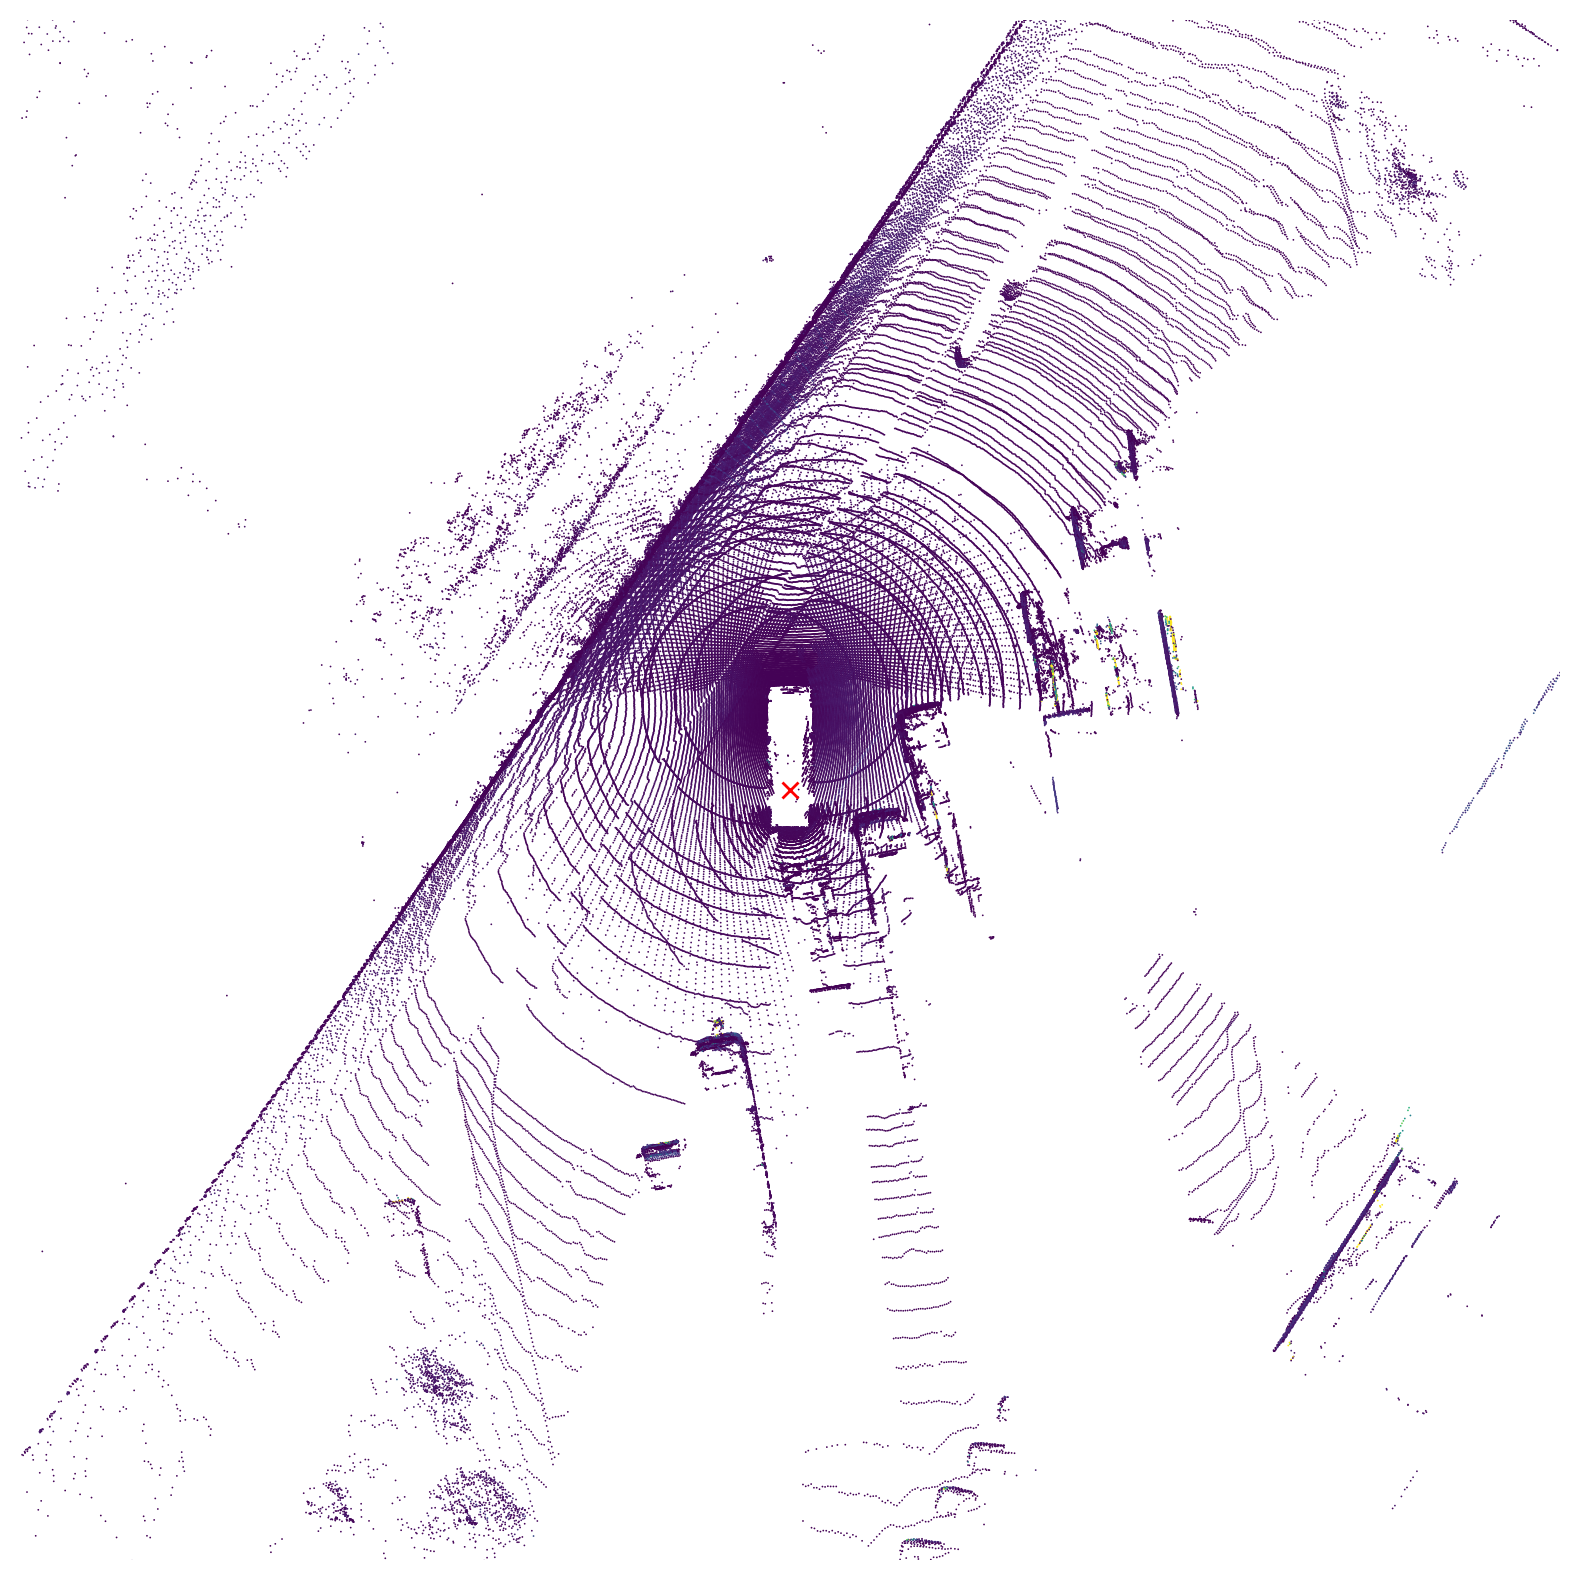

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize, Colormap
from matplotlib import cm
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from typing import List, Tuple, Union

# TruckScenes utils
from truckscenes.utils.geometry_utils import transform_matrix, view_points, BoxVisibility
from truckscenes.utils.data_classes import LidarPointCloud



def _render_pc_sample_data(trucksc,
                               sensor_modality: str,
                               sample_data_token: str,
                               with_anns: bool = True,
                               selected_anntokens: List[str] = None,
                               box_vis_level: BoxVisibility = BoxVisibility.ANY,
                               axes_limit: Union[List[float], Tuple[float], float] = 40,
                               ax: Axes = None,
                               nsweeps: int = 1,
                               use_flat_vehicle_coordinates: bool = True,
                               point_scale: float = 1.0,
                               cmap: str = 'viridis',
                               cnorm: bool = True) -> None:

        intensities = []
        points = []

        for sd_token in sample_data_token:
            sd_record = trucksc.get('sample_data', sd_token)

            sample_rec = trucksc.get('sample', sd_record['sample_token'])
            chan = sd_record['channel']
            ref_chan = 'LIDAR_LEFT'
            ref_sd_token = sample_rec['data'][ref_chan]
            ref_sd_record = trucksc.get('sample_data', ref_sd_token)

            if sensor_modality == 'lidar':
                # Get aggregated lidar point cloud in lidar frame.
                pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)
                velocities = None
                intensity = pc.points[3, :]
            else:
                # Get aggregated radar point cloud in reference frame.
                # The point cloud is transformed to the reference frame
                # for visualization purposes.
                pc, _ = RadarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)

                # Transform radar velocities (x is front, y is left),
                # as these are not transformed when loading the
                # point cloud.
                radar_cs_record = trucksc.get('calibrated_sensor',
                                                   sd_record['calibrated_sensor_token'])
                ref_cs_record = trucksc.get('calibrated_sensor',
                                                 ref_sd_record['calibrated_sensor_token'])
                velocities = pc.points[3:5, :]
                velocities = np.vstack((velocities, np.zeros(pc.points.shape[1])))
                velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix,
                                    velocities)
                velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T,
                                    velocities)
                velocities[2, :] = np.zeros(pc.points.shape[1])
                intensity = pc.points[6, :]

            # By default we render the sample_data top down in the sensor frame.
            # This is slightly inaccurate when rendering the map as the sensor frame may
            # not be perfectly upright.
            if use_flat_vehicle_coordinates:
                # Retrieve transformation matrices for reference point cloud.
                cs_record = trucksc.get('calibrated_sensor',
                                             ref_sd_record['calibrated_sensor_token'])
                pose_record = trucksc.get('ego_pose',
                                               ref_sd_record['ego_pose_token'])
                ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                              rotation=Quaternion(cs_record["rotation"]))

                # Compute rotation between 3D vehicle pose and "flat" vehicle pose
                # (parallel to global z plane).
                ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
                rotation_vehicle_flat_from_vehicle = np.dot(
                    Quaternion(scalar=np.cos(ego_yaw / 2),
                               vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
                    Quaternion(pose_record['rotation']).inverse.rotation_matrix)
                vehicle_flat_from_vehicle = np.eye(4)
                vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
                viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

                # Rotate upwards
                vehicle_flat_up_from_vehicle_flat = np.eye(4)
                rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
                vehicle_flat_up_from_vehicle_flat[:3, :3] = \
                    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                               angle=np.pi/2).rotation_matrix
                viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)
            else:
                viewpoint = np.eye(4)

            # Show point cloud
            points.append(view_points(pc.points[:3, :], viewpoint, normalize=False))
            intensities.append(intensity)

        points = np.concatenate(points, axis=1)
        intensities = np.concatenate(intensities, axis=0)

        # Colormapping
        if cnorm:
            norm = Normalize(vmin=np.min(intensities), vmax=np.max(intensities), clip=True)
        else:
            norm = None
        mapper = ScalarMappable(norm=norm, cmap=cmap)
        colors = mapper.to_rgba(intensities)[..., :3]

        point_scale = point_scale * 0.4 if sensor_modality == 'lidar' else point_scale * 3.0
        ax.scatter(points[0, :], points[1, :], marker='o',
                   c=colors, s=point_scale, edgecolors='none')

        # Show ego vehicle
        ax.plot(0, 0, 'x', color='red')

        # Show boxes
        if with_anns:
            # Get boxes in lidar frame.box_vis_level
            _, boxes, _ = trucksc.get_sample_data(
                ref_sd_token, box_vis_level=box_vis_level, selected_anntokens=selected_anntokens,
                use_flat_vehicle_coordinates=use_flat_vehicle_coordinates
            )



            # Render boxes
            for box in boxes:
                c = np.array(trucksc.colormap[box.name]) / 255.0
                box.render(ax, view=np.eye(4), colors=(c, c, c), linewidth=2.0)
                print(box)
        # Limit visible range.
        ax.set_xlim(-axes_limit[0], axes_limit[0])
        ax.set_ylim(-axes_limit[1], axes_limit[1])


def render_sample_data(trucksc,
                           sample_data_token: str,
                           with_anns: bool = True,
                           selected_anntokens: List[str] = None,
                           box_vis_level: BoxVisibility = BoxVisibility.ANY,
                           axes_limit: Union[List[float], Tuple[float], float] = 40,
                           ax: Axes = None,
                           nsweeps: int = 1,
                           out_path: str = None,
                           use_flat_vehicle_coordinates: bool = True,
                           point_scale: float = 1.0,
                           cmap: str = 'viridis',
                           cnorm: bool = True) -> None:

        if not isinstance(sample_data_token, list):
            sample_data_token = [sample_data_token]

        if not isinstance(cmap, Colormap):
            cmap = plt.get_cmap(cmap)

        if not isinstance(axes_limit, (list, tuple)):
            axes_limit = [axes_limit, axes_limit]

        # Determine sensor modality
        sensor_modality = trucksc.get('sample_data', sample_data_token[0])['sensor_modality']

        # Render Point Cloud data
        if sensor_modality in ['lidar', 'radar']:
            # Init axes.
            if ax is None:
                _, ax = plt.subplots(1, 1, figsize=(9, 9))

            # Render point cloud data onto axis
            _render_pc_sample_data(trucksc, sensor_modality, sample_data_token, False,
                                        selected_anntokens, box_vis_level, axes_limit,
                                        ax, nsweeps, use_flat_vehicle_coordinates,
                                        point_scale, cmap, cnorm)



        ax.axis('off')
        ax.set_title('{} {labels_type}'.format(sensor_modality.upper(), labels_type=''))
        ax.set_aspect('equal')

        if out_path is not None:
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=800)


def render_lidar_fused(trucksc,
                       sample_token: str,
                       box_vis_level: BoxVisibility = BoxVisibility.ANY,
                       nsweeps: int = 1,
                       out_path: str = None,
                       verbose: bool = True) -> None:

    record = trucksc.get('sample', sample_token)

    lidar_tokens = []
    for channel, token in record['data'].items():
        sd_record = trucksc.get('sample_data', token)
        if sd_record['sensor_modality'] == 'lidar':
            lidar_tokens.append(token)

    if len(lidar_tokens) == 0:
        print(f"Nessun LIDAR per {sample_token}")
        return

    # === Imposta figura quadrata fissa (es: 10x10 pollici a 200 dpi → 2000x2000 px)
    fig_size_inch = 10
    dpi = 200
    fig, ax = plt.subplots(1, 1, figsize=(fig_size_inch, fig_size_inch), dpi=dpi)

    # === Rendering combinato di tutti i lidar del sample
    render_sample_data(
        trucksc,
        sample_data_token=lidar_tokens,   # LISTA dei lidar da fondere
        with_anns=True,
        box_vis_level=box_vis_level,
        axes_limit=(40, 40),  # range XY coerente con annotazioni
        ax=ax,
        nsweeps=nsweeps,
        use_flat_vehicle_coordinates=True,
        point_scale=1.0,
        cmap='viridis',
        cnorm=True
    )


    # === Pulizia finale
    ax.set_title("")
    ax.axis("off")

    # === Salvataggio immagine BEV
    out_img_path = f"DATASET/immagine/{sample_token}.png"
    os.makedirs(os.path.dirname(out_img_path), exist_ok=True)

    plt.savefig(
        out_img_path,
        bbox_inches='tight',   # taglia solo bordi vuoti reali
        pad_inches=0,
        transparent=False
    )
    plt.close(fig)
    #plt.show()




# === Cartella in cui salvare le immagini ===
output_img_dir = "DATASET/immagine"
os.makedirs(output_img_dir, exist_ok=True)

# === Itera su tutti i sample token ===
sample_tokens = [s['token'] for s in trucksc.sample]  # lista completa dei sample_token

for i, sample_token in enumerate(sample_tokens):
    print(f"[{i+1}/{len(sample_tokens)}] Rendering sample: {sample_token}")
    try:
        render_lidar_fused(trucksc, sample_token=sample_token)
    except Exception as e:
        print(f"Errore nel rendering di {sample_token}: {e}")



#trucksc.render_sample(token)


In [ ]:
# Specifica il sample_token
sample_token = "34d0b00f1801498c803ec07dce543b72"  # Inserisci il tuo sample_token

# Ottieni i dati del sample
sample = trucksc.get('sample', sample_token)
# Estrai le annotazioni associate al sample
annotation_tokens = sample['anns']


boxes = [trucksc.get_box(ann_token) for ann_token in annotation_tokens]
for box in boxes:
    print(f"box:  {box}")


box:  label: nan, score: nan, xyz: [699177.38, 5320413.07, 593.69], wlh: [1.88, 6.02, 2.01], rot axis: [0.00, 0.00, 1.00], ang(degrees): -63.24, ang(rad): -1.10, vel: nan, nan, nan, name: vehicle.car, token: c1a3722926444838b0aae3aad80b9d2e
box:  label: nan, score: nan, xyz: [699132.87, 5320561.10, 596.37], wlh: [1.95, 4.45, 1.79], rot axis: [-0.00, 0.00, 1.00], ang(degrees): 117.03, ang(rad): 2.04, vel: nan, nan, nan, name: vehicle.car, token: ff0acb2b04124e36a0e42a7df3b312ba
box:  label: nan, score: nan, xyz: [699135.94, 5320500.59, 595.66], wlh: [1.55, 4.54, 2.08], rot axis: [0.00, 0.00, 1.00], ang(degrees): -64.54, ang(rad): -1.13, vel: nan, nan, nan, name: vehicle.trailer, token: 5b132c99323443c7b1cb098affb29509
box:  label: nan, score: nan, xyz: [699223.98, 5320348.53, 594.04], wlh: [1.18, 0.31, 3.23], rot axis: [-0.00, -0.00, 1.00], ang(degrees): -59.56, ang(rad): -1.04, vel: nan, nan, nan, name: static_object.traffic_sign, token: 1276de0ac0f04e538fbfdb29de31d9ba
box:  label: na

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize, Colormap
from matplotlib import cm
from matplotlib.axes import Axes
from pyquaternion import Quaternion
from typing import List, Tuple, Union
import matplotlib.patches as patches

# TruckScenes utils
from truckscenes.utils.geometry_utils import transform_matrix, view_points, BoxVisibility
from truckscenes.utils.data_classes import LidarPointCloud



def _render_pc_sample_data(trucksc,
                               sensor_modality: str,
                               sample_data_token: str,
                               with_anns: bool = True,
                               selected_anntokens: List[str] = None,
                               box_vis_level: BoxVisibility = BoxVisibility.ANY,
                               axes_limit: Union[List[float], Tuple[float], float] = 40,
                               ax: Axes = None,
                               nsweeps: int = 1,
                               use_flat_vehicle_coordinates: bool = True,
                               point_scale: float = 1.0,
                               cmap: str = 'viridis',
                               cnorm: bool = True) -> None:

        intensities = []
        points = []

        for sd_token in sample_data_token:
            sd_record = trucksc.get('sample_data', sd_token)

            sample_rec = trucksc.get('sample', sd_record['sample_token'])
            chan = sd_record['channel']
            ref_chan = 'LIDAR_LEFT'
            ref_sd_token = sample_rec['data'][ref_chan]
            ref_sd_record = trucksc.get('sample_data', ref_sd_token)

            if sensor_modality == 'lidar':
                # Get aggregated lidar point cloud in lidar frame.
                pc, _ = LidarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)
                velocities = None
                intensity = pc.points[3, :]
            else:
                # Get aggregated radar point cloud in reference frame.
                # The point cloud is transformed to the reference frame
                # for visualization purposes.
                pc, _ = RadarPointCloud.from_file_multisweep(trucksc, sample_rec,
                                                             chan, ref_chan,
                                                             nsweeps=nsweeps)

                # Transform radar velocities (x is front, y is left),
                # as these are not transformed when loading the
                # point cloud.
                radar_cs_record = trucksc.get('calibrated_sensor',
                                                   sd_record['calibrated_sensor_token'])
                ref_cs_record = trucksc.get('calibrated_sensor',
                                                 ref_sd_record['calibrated_sensor_token'])
                velocities = pc.points[3:5, :]
                velocities = np.vstack((velocities, np.zeros(pc.points.shape[1])))
                velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix,
                                    velocities)
                velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T,
                                    velocities)
                velocities[2, :] = np.zeros(pc.points.shape[1])
                intensity = pc.points[6, :]

            # By default we render the sample_data top down in the sensor frame.
            # This is slightly inaccurate when rendering the map as the sensor frame may
            # not be perfectly upright.
            if use_flat_vehicle_coordinates:
                # Retrieve transformation matrices for reference point cloud.
                cs_record = trucksc.get('calibrated_sensor',
                                             ref_sd_record['calibrated_sensor_token'])
                pose_record = trucksc.get('ego_pose',
                                               ref_sd_record['ego_pose_token'])
                ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                              rotation=Quaternion(cs_record["rotation"]))

                # Compute rotation between 3D vehicle pose and "flat" vehicle pose
                # (parallel to global z plane).
                ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
                rotation_vehicle_flat_from_vehicle = np.dot(
                    Quaternion(scalar=np.cos(ego_yaw / 2),
                               vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
                    Quaternion(pose_record['rotation']).inverse.rotation_matrix)
                vehicle_flat_from_vehicle = np.eye(4)
                vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
                viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)

                # Rotate upwards
                vehicle_flat_up_from_vehicle_flat = np.eye(4)
                rotation_axis = Quaternion(matrix=viewpoint[:3, :3])
                vehicle_flat_up_from_vehicle_flat[:3, :3] = \
                    Quaternion(axis=rotation_axis.rotate([0, 0, 1]),
                               angle=np.pi/2).rotation_matrix
                viewpoint = np.dot(vehicle_flat_up_from_vehicle_flat, viewpoint)
            else:
                viewpoint = np.eye(4)

            # Show point cloud
            points.append(view_points(pc.points[:3, :], viewpoint, normalize=False))
            intensities.append(intensity)

        points = np.concatenate(points, axis=1)
        intensities = np.concatenate(intensities, axis=0)

        # Colormapping
        if cnorm:
            norm = Normalize(vmin=np.min(intensities), vmax=np.max(intensities), clip=True)
        else:
            norm = None
        mapper = ScalarMappable(norm=norm, cmap=cmap)
        colors = mapper.to_rgba(intensities)[..., :3]

        point_scale = point_scale * 0.4 if sensor_modality == 'lidar' else point_scale * 3.0
        ax.scatter(points[0, :], points[1, :], marker='o',
                   c=colors, s=point_scale, edgecolors='none')

        # Show ego vehicle
        ax.plot(0, 0, 'x', color='red')

        # Show boxes
        if with_anns:
            # Get boxes in lidar frame.box_vis_level
            _, boxes, _ = trucksc.get_sample_data(
                ref_sd_token, box_vis_level=box_vis_level, selected_anntokens=selected_anntokens,
                use_flat_vehicle_coordinates=use_flat_vehicle_coordinates
            )



            # Render boxes
            for box in boxes:
                c = np.array(trucksc.colormap[box.name]) / 255.0
                box.render(ax, view=np.eye(4), colors=(c, c, c), linewidth=2.0)
                print(box)
        # Limit visible range.
        ax.set_xlim(-axes_limit[0], axes_limit[0])
        ax.set_ylim(-axes_limit[1], axes_limit[1])


def render_sample_data(trucksc,
                           sample_data_token: str,
                           with_anns: bool = True,
                           selected_anntokens: List[str] = None,
                           box_vis_level: BoxVisibility = BoxVisibility.ANY,
                           axes_limit: Union[List[float], Tuple[float], float] = 40,
                           ax: Axes = None,
                           nsweeps: int = 1,
                           out_path: str = None,
                           use_flat_vehicle_coordinates: bool = True,
                           point_scale: float = 1.0,
                           cmap: str = 'viridis',
                           cnorm: bool = True) -> None:

        if not isinstance(sample_data_token, list):
            sample_data_token = [sample_data_token]

        if not isinstance(cmap, Colormap):
            cmap = plt.get_cmap(cmap)

        if not isinstance(axes_limit, (list, tuple)):
            axes_limit = [axes_limit, axes_limit]

        # Determine sensor modality
        sensor_modality = trucksc.get('sample_data', sample_data_token[0])['sensor_modality']

        # Render Point Cloud data
        if sensor_modality in ['lidar', 'radar']:
            # Init axes.
            if ax is None:
                _, ax = plt.subplots(1, 1, figsize=(9, 9))

            # Render point cloud data onto axis
            _render_pc_sample_data(trucksc, sensor_modality, sample_data_token, False,
                                        selected_anntokens, box_vis_level, axes_limit,
                                        ax, nsweeps, use_flat_vehicle_coordinates,
                                        point_scale, cmap, cnorm)



        ax.axis('off')
        ax.set_title('{} {labels_type}'.format(sensor_modality.upper(), labels_type=''))
        ax.set_aspect('equal')

        if out_path is not None:
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=800)

    # === Funzione per ottenere x, y, w, h da un Box in vista BEV
def get_bev_box(box):
        view = np.eye(4)
        corners = view_points(box.corners(), view, normalize=False)[:2, :]  # Shape (2, 8)

        x_min = np.min(corners[0, :])
        x_max = np.max(corners[0, :])
        y_min = np.min(corners[1, :])
        y_max = np.max(corners[1, :])

        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min

        return x_center, y_center, width, height

IMG_WIDTH = 2000  # pixel
IMG_HEIGHT = 2000
AXES_LIMIT = 40  # metri → [-40, +40] quindi 80x80 m

def convert_to_yolo_coords(x, y, w, h):
    x_px = (x + AXES_LIMIT) / (2 * AXES_LIMIT)
    y_px = (y + AXES_LIMIT) / (2 * AXES_LIMIT)
    w_px = w / (2 * AXES_LIMIT)
    h_px = h / (2 * AXES_LIMIT)

    # Clipping tra 0 e 1
    x_px = np.clip(x_px, 0.0, 1.0)
    y_px = np.clip(y_px, 0.0, 1.0)
    w_px = np.clip(w_px, 0.0, 1.0)
    h_px = np.clip(h_px, 0.0, 1.0)

    return x_px, y_px, w_px, h_px


def save_yolo_labels(trucksc, sample_token, out_dir="DATASET/label", class_map=None):
    os.makedirs(out_dir, exist_ok=True)
    sample = trucksc.get("sample", sample_token)

    # === Usa LIDAR_LEFT come canale di riferimento (fisso, come nel rendering)
    ref_chan = "LIDAR_LEFT"
    ref_sd_token = sample["data"].get(ref_chan)
    if ref_sd_token is None:
        print(f"Nessun {ref_chan} per sample {sample_token}")
        return

    # === Prendi le box con coordinate flatten (BEV)
    _, boxes, _ = trucksc.get_sample_data(
        ref_sd_token,
        use_flat_vehicle_coordinates=True
    )

    out_path = os.path.join(out_dir, f"{sample_token}.txt")
    with open(out_path, "w") as f:
        for box in boxes:
            x, y, w, h = get_bev_box(box)
            x_norm, y_norm, w_norm, h_norm = convert_to_yolo_coords(x, y, w, h)

            if class_map is None:
                class_id = 0
            else:
                class_id = class_map.get(box.name, 0)

            f.write(f"{class_id} {x_norm:.6f} {y_norm:.6f} {w_norm:.6f} {h_norm:.6f}\n")

    print(f"Salvato: {out_path}")


def get_class_map(trucksc):
    all_class_names = set()
    for sample in trucksc.sample:
        for ann_token in sample["anns"]:
            box = trucksc.get_box(ann_token)
            all_class_names.add(box.name)
    sorted_class_names = sorted(all_class_names)
    print(sorted_class_names)
    return {name: idx for idx, name in enumerate(sorted_class_names)}


def render_lidar_fused(trucksc,
                       sample_token: str,
                       box_vis_level: BoxVisibility = BoxVisibility.ANY,
                       nsweeps: int = 1,
                       out_path: str = None,
                       verbose: bool = True) -> None:

    record = trucksc.get('sample', sample_token)

    lidar_tokens = []
    for channel, token in record['data'].items():
        sd_record = trucksc.get('sample_data', token)
        if sd_record['sensor_modality'] == 'lidar':
            lidar_tokens.append(token)

    if len(lidar_tokens) == 0:
        print(f"Nessun LIDAR per {sample_token}")
        return

    # === Imposta figura quadrata fissa (es: 10x10 pollici a 200 dpi → 2000x2000 px)
    fig_size_inch = 10
    dpi = 200
    fig, ax = plt.subplots(1, 1, figsize=(fig_size_inch, fig_size_inch), dpi=dpi)

    # === Rendering combinato di tutti i lidar del sample
    render_sample_data(
        trucksc,
        sample_data_token=lidar_tokens,   # LISTA dei lidar da fondere
        with_anns=True,
        box_vis_level=box_vis_level,
        axes_limit=(40, 40),  # range XY coerente con annotazioni
        ax=ax,
        nsweeps=nsweeps,
        use_flat_vehicle_coordinates=True,
        point_scale=1.0,
        cmap='viridis',
        cnorm=True
    )


    # === Pulizia finale
    ax.set_title("")
    ax.axis("off")

    # === Salvataggio immagine BEV
    out_img_path = f"DATASET/immagine/{sample_token}.png"
    os.makedirs(os.path.dirname(out_img_path), exist_ok=True)

    plt.savefig(
        out_img_path,
        bbox_inches='tight',   # taglia solo bordi vuoti reali
        pad_inches=0,
        transparent=False
    )





# === Cartella in cui salvare le immagini ===
output_img_dir = "DATASET/immagine"
os.makedirs(output_img_dir, exist_ok=True)

# === Itera su tutti i sample token ===
sample_tokens = [s['token'] for s in trucksc.sample]  # lista completa dei sample_token

for i, sample_token in enumerate(sample_tokens):
    print(f"[{i+1}/{len(sample_tokens)}] Rendering sample: {sample_token}")
    try:
        render_lidar_fused(trucksc, sample_token=sample_token)
        save_yolo_labels(trucksc, sample_token=sample_token, class_map=get_class_map(trucksc))
    except Exception as e:
        print(f"Errore nel rendering di {sample_token}: {e}")

In [ ]:
import os
import shutil
import random

# === Config ===
img_dir = "DATASET/immagine"
label_dir = "DATASET/label"
output_img_dir = "DATASET/images"
output_label_dir = "DATASET/labels"
val_ratio = 0.1  # 10% validazione

# === Crea cartelle
for split in ["train", "val"]:
    os.makedirs(os.path.join(output_img_dir, split), exist_ok=True)
    os.makedirs(os.path.join(output_label_dir, split), exist_ok=True)

# === Prendi lista immagini
all_images = [f for f in os.listdir(img_dir) if f.endswith(".png")]
random.shuffle(all_images)

# === Dividi
val_count = int(len(all_images) * val_ratio)
val_images = set(all_images[:val_count])

# === Copia file
for img_file in all_images:
    base_name = os.path.splitext(img_file)[0]
    label_file = base_name + ".txt"

    split = "val" if img_file in val_images else "train"

    shutil.copy(os.path.join(img_dir, img_file),
                os.path.join(output_img_dir, split, img_file))

    src_label_path = os.path.join(label_dir, label_file)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path,
                    os.path.join(output_label_dir, split, label_file))
    else:
        print(f"⚠️ Warning: Label mancante per {img_file}")


## YOLO traning

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [5]:
import zipfile

with zipfile.ZipFile("DATASET.zip", 'r') as zip_ref:
    zip_ref.extractall("DATASET")


In [6]:
from ultralytics import YOLO

# Carica un modello pre-addestrato (es. yolov8n per iniziare leggero)
model = YOLO('yolov8n.pt')
model.train(
    data="DATASET/dataset.yaml",  # percorso al tuo file yaml
    epochs=50,                    # o meno per test iniziale
    imgsz=640,                    # o 800/1024 se hai immagini grandi
    batch=16,                     # regola in base alla RAM/GPU
    name="yolo_bev_lidar"         # nome del progetto di output
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 135MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=DATASET/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_bev_lidar, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 755k/755k [00:00<00:00, 27.7MB/s]

Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,014,358 parameters, 3,014,342 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2301.1±1494.3 MB/s, size: 1157.2 KB)


train: Scanning /content/DATASET/labels/train... 388 images, 0 backgrounds, 104 corrupt: 100%|██████████| 388/388 [00:00<00:00, 592.18it/s]

train: /content/DATASET/images/train/0085b50c1d064bbba1c214e4d712d514.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.6206      1.5671       1.386      2.9978      1.7685      2.7314       1.793      2.0901      1.5632      1.3345      2.0485      1.7316      1.9623      1.9122      1.0501      1.5335      2.0849      2.2301      1.7319      2.5976      1.5025      1.6463      1.5602      1.5148      1.6528      1.6027
      1.8843      1.2051      2.9604      2.4093      2.0171      1.3396]
train: /content/DATASET/images/train/00b7a051298345d7a162393e5c0e2764.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2439      1.3192      1.2617      1.0161      1.2888      1.1364      1.3653      1.5835      1.1086      2.0202       1.435      1.1922      1.5094       1.559      1.3016      1.2134      1.1041      1.2943      1.1006      1.2967      1.3431      1.4489      1.6128      1.3323        1.02      1.5113
  

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1173.3±1655.6 MB/s, size: 591.0 KB)


val: Scanning /content/DATASET/labels/val... 69 images, 0 backgrounds, 38 corrupt: 100%|██████████| 69/69 [00:00<00:00, 547.85it/s]

val: /content/DATASET/images/val/03595fbbc36e4b509eec679e8fbfe3b0.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     3.1958      1.2942      1.8759      3.2013      1.4737       1.989      1.7668      1.0003      1.3291      2.0963      1.4678      2.0102      2.1393      1.3595      1.4625       1.868      3.3048      2.9802       2.623       2.506      1.2115      2.6979      1.6792      1.6422      1.5899      2.5563
       1.039      1.9282      2.8644]
val: /content/DATASET/images/val/0a7844ac9902454292fe37c39d7e27ba.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.9737      1.9107      2.8308      1.5094      2.2298      1.7951      2.0734      2.0177      1.2604      1.9379      1.2473      2.4837      1.9161      1.0035      2.7934      1.9034      1.1104      1.7669      2.3934      1.9168      1.5549      2.1469      1.7344      1.3251      1.5452      2.1157
      2.0697      1.4142      3.1681      1.40

Plotting labels to runs/detect/yolo_bev_lidar/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo_bev_lidar
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.1G      4.372      5.179       2.93        504        640: 100%|██████████| 18/18 [00:16<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         31       1567          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.59G      3.827      4.687        2.4        687        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.16s/it]

                   all         31       1567    0.00346     0.0333     0.0193     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.62G      3.462      4.055      2.047        783        640: 100%|██████████| 18/18 [00:11<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         31       1567     0.0141     0.0443     0.0367     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.63G      3.346      3.558      1.931        715        640: 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         31       1567     0.0168      0.123     0.0738     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.65G      3.208      3.318      1.805        786        640: 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         31       1567     0.0243      0.115     0.0817      0.043



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.67G      3.097      3.168      1.726        735        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         31       1567      0.159     0.0909     0.0825     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.69G      3.019      3.111      1.695        714        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         31       1567      0.605     0.0826     0.0843     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.7G      2.991      3.067       1.68        931        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         31       1567      0.239     0.0908     0.0942     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.72G       2.84      2.904       1.59        795        640: 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         31       1567      0.166      0.106     0.0958     0.0605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.74G      2.899      2.899      1.596       1294        640: 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         31       1567      0.151      0.097     0.0958     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.75G      2.746      2.768      1.568        702        640: 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         31       1567     0.0783      0.103     0.0949     0.0601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.77G      2.809      2.771      1.565        925        640: 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         31       1567     0.0887     0.0931     0.0941     0.0633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.79G      2.737      2.714      1.557        673        640: 100%|██████████| 18/18 [00:13<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         31       1567      0.332     0.0843     0.0973     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.8G      2.731      2.727      1.549        920        640: 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         31       1567      0.272     0.0936     0.0974     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.82G      2.669      2.613      1.528        786        640: 100%|██████████| 18/18 [00:14<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         31       1567      0.195     0.0965     0.0964     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.84G      2.614      2.585      1.494        849        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         31       1567      0.317     0.0848      0.108     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.39G      2.635      2.541      1.463        831        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         31       1567      0.207      0.116      0.114      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.41G      2.595       2.55      1.508        621        640: 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         31       1567      0.212      0.111      0.114     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.43G      2.641      2.533      1.496        730        640: 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         31       1567      0.333     0.0975      0.115      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.44G      2.542      2.426      1.441        847        640: 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         31       1567      0.133      0.134      0.128     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.46G      2.519      2.434      1.458        782        640: 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         31       1567      0.107      0.125      0.116     0.0842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.03G      2.505      2.447      1.466        500        640: 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         31       1567      0.151      0.123      0.124     0.0859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.05G      2.536      2.458      1.464        585        640: 100%|██████████| 18/18 [00:12<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         31       1567      0.156      0.125       0.13     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.06G      2.495      2.385      1.436       1038        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         31       1567       0.15      0.136      0.127     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.08G      2.449       2.38      1.424        687        640: 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         31       1567      0.136      0.132       0.13     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       6.1G      2.464      2.361      1.434        846        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         31       1567      0.109      0.143      0.128     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.12G      2.444      2.372      1.431        806        640: 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         31       1567      0.137      0.141      0.134      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.13G      2.453      2.383      1.454        768        640: 100%|██████████| 18/18 [00:13<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         31       1567      0.155      0.135      0.135     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.15G      2.382      2.297      1.414       1042        640: 100%|██████████| 18/18 [00:13<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         31       1567      0.201      0.132      0.137     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.17G      2.448      2.308      1.416        919        640: 100%|██████████| 18/18 [00:12<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         31       1567      0.134      0.146      0.138     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.18G      2.388      2.301      1.405        648        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         31       1567       0.15      0.151      0.141      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       6.2G      2.418      2.284      1.396        946        640: 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         31       1567      0.154       0.14      0.137     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.78G      2.427      2.307      1.426        751        640: 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         31       1567      0.145      0.147       0.14     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.8G      2.425      2.284      1.413       1104        640: 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         31       1567      0.148      0.144      0.142      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.81G      2.293      2.198      1.367        684        640: 100%|██████████| 18/18 [00:13<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         31       1567      0.152      0.144      0.142      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.83G      2.378      2.271      1.393        927        640: 100%|██████████| 18/18 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         31       1567      0.143      0.156      0.145      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.85G      2.362      2.241      1.393        918        640: 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         31       1567      0.147      0.156      0.146       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.87G      2.317      2.193      1.376        954        640: 100%|██████████| 18/18 [00:12<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         31       1567      0.156      0.154      0.147       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.88G      2.363      2.229      1.393        654        640: 100%|██████████| 18/18 [00:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         31       1567       0.15      0.155      0.147      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       6.9G      2.341       2.18      1.349        962        640: 100%|██████████| 18/18 [00:13<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         31       1567      0.155      0.155       0.15       0.11


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.92G       2.21       2.34      1.343        468        640: 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         31       1567       0.16      0.159      0.148      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.93G      2.235      2.296      1.336        559        640: 100%|██████████| 18/18 [00:12<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         31       1567      0.161      0.148      0.146      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.95G      2.209      2.277       1.34        573        640: 100%|██████████| 18/18 [00:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         31       1567      0.167      0.147      0.145      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.97G      2.165      2.238      1.328        493        640: 100%|██████████| 18/18 [00:12<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         31       1567      0.166      0.146      0.148      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.98G      2.192      2.226      1.325        338        640: 100%|██████████| 18/18 [00:11<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         31       1567      0.215      0.153      0.146       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         7G      2.152      2.253      1.328        560        640: 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         31       1567      0.215      0.157      0.145      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.02G      2.155      2.221      1.309        413        640: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         31       1567      0.215      0.159      0.147      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.04G      2.145      2.179      1.306        788        640: 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         31       1567      0.218      0.161      0.153      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.05G      2.136      2.171        1.3        519        640: 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         31       1567      0.216      0.162      0.151      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.07G      2.105      2.177      1.297        470        640: 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         31       1567      0.214      0.162      0.152      0.115



50 epochs completed in 0.204 hours.
Optimizer stripped from runs/detect/yolo_bev_lidar/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolo_bev_lidar/weights/best.pt, 6.3MB

Validating runs/detect/yolo_bev_lidar/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,158 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


                   all         31       1567      0.216      0.161      0.153      0.115
                animal          4          4          0          0          0          0
human.pedestrian.adult         13         83          0          0          0          0
human.pedestrian.child          5          8          0          0          0          0
human.pedestrian.construction_worker          8         26          0          0          0          0
human.pedestrian.stroller          4          4          0          0          0          0
movable_object.barrier          3          3          0          0          0          0
movable_object.trafficcone          9         63          0          0          0          0
static_object.traffic_sign         27        391          0          0          0          0
       vehicle.bicycle          8          8          0          0          0          0
     vehicle.bus.rigid          9         34      0.301      0.206      0.138     0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da3b2bfc610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    

In [5]:
import shutil
from google.colab import files
shutil.make_archive("runs", 'zip', "runs")
files.download("runs.zip")





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

image_path="/content/DATASET/images/val/0531b8003c4941c481d29ed1caa924f7.png"
# Carica il modello addestrato
model = YOLO("runs/detect/yolo_bev_lidar/weights/best.pt")
results = model.predict(source="/content/DATASET/images/val/0531b8003c4941c481d29ed1caa924f7.png", save=True, conf=0.1)
output_img = results[0].save_dir + "/" + os.path.basename(image_path)




image 1/1 /content/DATASET/images/val/0531b8003c4941c481d29ed1caa924f7.png: 640x640 1 vehicle.ego_trailer, 7.3ms
Speed: 3.8ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
